# Netflix Dataset Analysis

In [73]:
import numpy as np
import pandas as pd
import collections as cl
import matplotlib.pyplot as plt

### Reading dataset

In [74]:
dataf = pd.read_csv('netflix_dataset.csv',encoding = 'utf-8')

In [75]:
df = dataf.copy()

shape of the Dataset

In [76]:
print(df.shape)

(7787, 12)


Description of Dataset

In [77]:
print(df.describe())

       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


In [78]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


DataType of Each Column

In [79]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


### Checking the null values present in Dataset

In [80]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Removing the Null values 

In [81]:
df['cast'] = df['cast'].fillna('No Data')
df['director'] = df['director'].fillna('No Data')

columns_to_replace = ['country', 'date_added', 'rating']
for column in columns_to_replace:
    # if df[column].isna().sum() <= 500:  
        df[column] = df[column].fillna(df[column].mode()[0])


In [82]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [83]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,No Data,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,No Data,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Movies vs TV Show

In [84]:
k = dict(df['type'].value_counts())

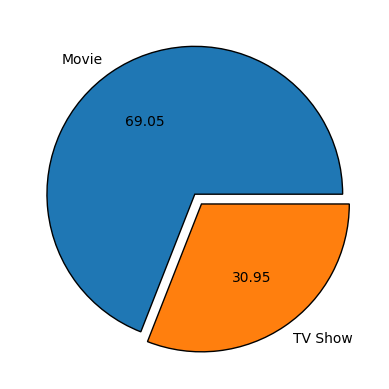

In [111]:
plt.pie(k.values(),labels = k.keys(),autopct = '%.2f',explode = (0, 0.08),wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1})
plt.show()

### COUNTRY WITH MOST CONTENT 

In [88]:
country = df.groupby('country')['type'].count()
country = country.sort_values(ascending = False)
country = country[0:10]
country = dict(country)

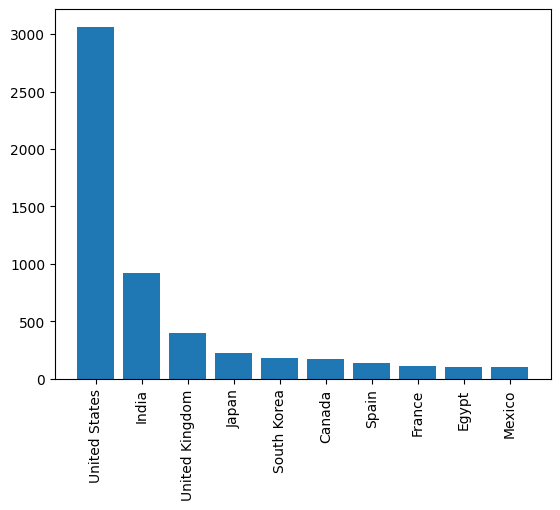

In [91]:
plt.bar(country.keys(),country.values())
plt.xticks(rotation = 90)
plt.show()

In [92]:
def conversion(extractyear):
    return extractyear[-4:].strip()

df['Year'] = df['date_added'].apply(conversion)

content = df.groupby('Year')['type'].count()
content = content.sort_values(ascending = False)

content = content[0:5]
content = dict(content)


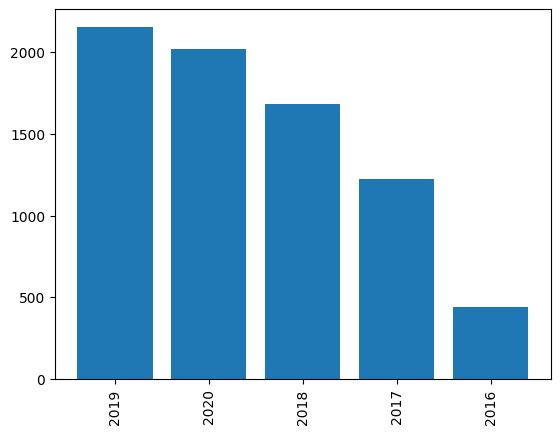

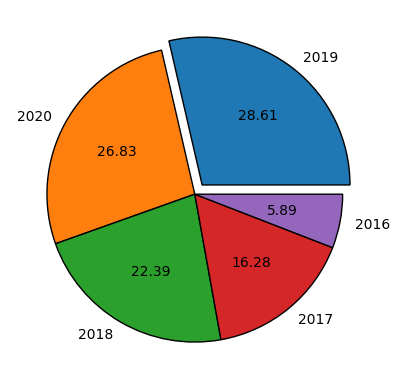

In [110]:
plt.bar(content.keys(),content.values())
plt.xticks(rotation = 90)
plt.show()
explodes = [0.08,0.0,0.0,0.0,0.0]
plt.pie(content.values(),labels = content.keys(),autopct = '%.2f',explode = explodes,wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1})
plt.show()